In [7]:
import matplotlib.pyplot as plt
import matplotlib as matplot
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sbn
import sklearn
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression


In [11]:
data=pd.read_csv(r'C:\Users\sat_d\Desktop\data-512-final-project-master\HR_comma_sep.csv')    

In [12]:
data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
data['attrition'] = data['left']
data['department'] = data['sales']

In [15]:
data.drop('left', axis=1)
data.drop('sales', axis=1)

data = data[['attrition', 'department', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary']]

In [16]:
data.head()

,attrition,department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,1,sales,0.38,0.53,2,157,3,0,0,low
1,1,sales,0.80,0.86,5,262,6,0,0,medium
2,1,sales,0.11,0.88,7,272,4,0,0,medium
3,1,sales,0.72,0.87,5,223,5,0,0,low
4,1,sales,0.37,0.52,2,159,3,0,0,low


In [17]:
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [18]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [20]:
le_salary = preprocessing.LabelEncoder()
data['salary'] = le_salary.fit_transform(data['salary'])

In [21]:
data['salary'].unique()

array([1, 2, 0], dtype=int64)

In [22]:
data.head()

,attrition,department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,1,sales,0.38,0.53,2,157,3,0,0,1
1,1,sales,0.80,0.86,5,262,6,0,0,2
2,1,sales,0.11,0.88,7,272,4,0,0,2
3,1,sales,0.72,0.87,5,223,5,0,0,1
4,1,sales,0.37,0.52,2,159,3,0,0,1


In [24]:
le_dept = preprocessing.LabelEncoder()
data['department'] = le_dept.fit_transform(data['department'])

In [25]:
data['department'].unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1], dtype=int64)

In [26]:
data.head()

,attrition,department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,1,7,0.38,0.53,2,157,3,0,0,1
1,1,7,0.80,0.86,5,262,6,0,0,2
2,1,7,0.11,0.88,7,272,4,0,0,2
3,1,7,0.72,0.87,5,223,5,0,0,1
4,1,7,0.37,0.52,2,159,3,0,0,1


In [27]:
print('rows, column:',data.shape)
data.describe()

rows, column: (14999, 10)


,attrition,department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,5.870525,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,1.347290
std,0.425924,2.868786,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.625819
min,0.000000,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,1.000000
50%,0.000000,7.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,1.000000
75%,0.000000,8.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,2.000000
max,1.000000,9.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,2.000000


In [28]:
data.groupby('attrition').mean()

,department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
attrition,,,,,,,,,
0,5.819041,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,1.347742
1,6.035284,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.345842


In [29]:
data.groupby('attrition').count()

,department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
attrition,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


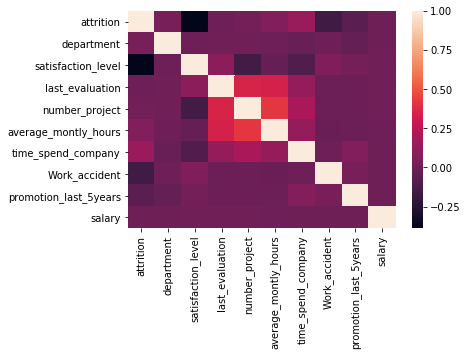

In [32]:
corr = data.corr()
corr = (corr)
sbn.heatmap(corr, 
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values)

Text(0.5, 1.0, 'Satisfaction Level of Employees')

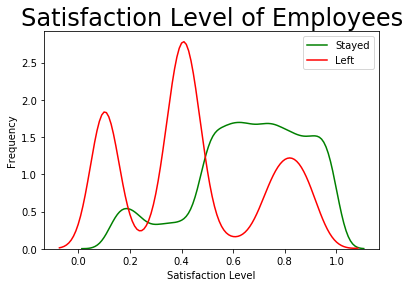

In [34]:
ax=sbn.kdeplot(data.loc[(data.attrition==0),'satisfaction_level'],label="Stayed",color='green')
ax=sbn.kdeplot(data.loc[(data.attrition==1),'satisfaction_level'],label="Left",color='red')
ax.set(xlabel='Satisfaction Level',ylabel="Frequency")
plt.title("Satisfaction Level of Employees",fontsize=24)

Text(0.5, 1.0, 'Promotion in last 5 years vs Attrition')

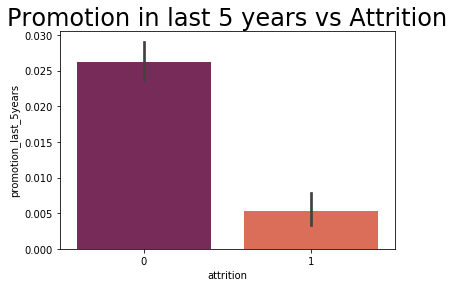

In [35]:
sbn.barplot(data.attrition,data.promotion_last_5years,palette="rocket")
plt.title("Promotion in last 5 years vs Attrition",fontsize=24)

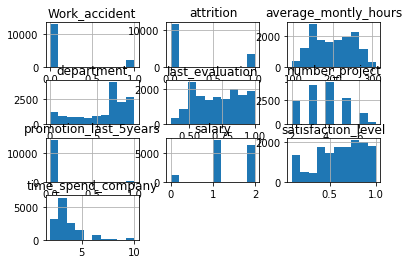

In [36]:
cdf=data.hist()
plt.show()

In [37]:
X = data.drop('attrition', axis=1) 
Y = data.attrition

In [38]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, random_state=0)

In [39]:
lr_model = LogisticRegression(solver='lbfgs', max_iter=100000, multi_class='auto')
fit = lr_model.fit(X_train, y_train)

In [40]:
coeff = []
coeff = np.array(fit.coef_)
features = np.array(X.columns.values)
featurescoef = np.array(coeff)
dataval = np.vstack((features, coeff))

In [41]:
dataval

array([['department', 'satisfaction_level', 'last_evaluation',
        'number_project', 'average_montly_hours', 'time_spend_company',
        'Work_accident', 'promotion_last_5years', 'salary'],
       [0.04298417645052539, -4.067442403532406, 0.7742794082069269,
        -0.3031481697910618, 0.0044544189265757145, 0.23757930658830934,
        -1.430737179584135, -1.5698070506547477, -0.0002609145455119903]],
      dtype=object)

In [42]:
lr_model.score(X_test,y_test)

0.764

In [48]:
#predict attrition
yhat = lr_model.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
#predict attrition probablity
yhat_prob = lr_model.predict_proba(X_test)
yhat_prob

array([[0.62, 0.38],
       [0.67, 0.33],
       [0.92, 0.08],
       ...,
       [0.8 , 0.2 ],
       [0.76, 0.24],
       [0.74, 0.26]])

In [50]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, predict_val)

R:\Software setup\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.764

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 220  649]
 [ 236 2645]]


Confusion matrix, without normalization
[[ 220  649]
 [ 236 2645]]


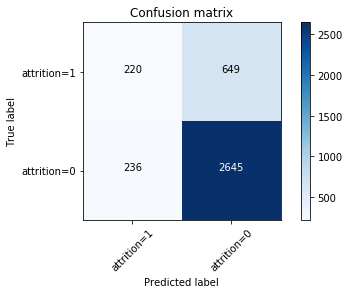

In [52]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['attrition=1','attrition=0'],normalize= False,  title='Confusion matrix')

In [53]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2881
           1       0.48      0.25      0.33       869

    accuracy                           0.76      3750
   macro avg       0.64      0.59      0.59      3750
weighted avg       0.73      0.76      0.74      3750



In [62]:
#Logarithmic Loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.436591007520053

In [64]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.3f" % log_loss(y_test, yhat_prob2))


LogLoss: : 0.477


R:\Software setup\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [1]:
print('END OF PROJECT')

END OF PROJECT
